In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
df = pd.read_csv('synthetic_data_pandapower_50kVA.csv')

In [3]:
# Features and target
features = ['voltage', 'current', 'temperature', 'oil_level', 'vibration', 
            'power_factor', 'frequency', 'harmonics', 'load_factor']
X = df[features]
y = df['fault_type']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 0.9500


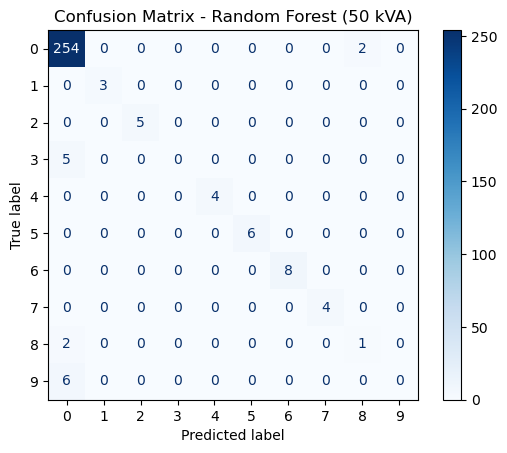

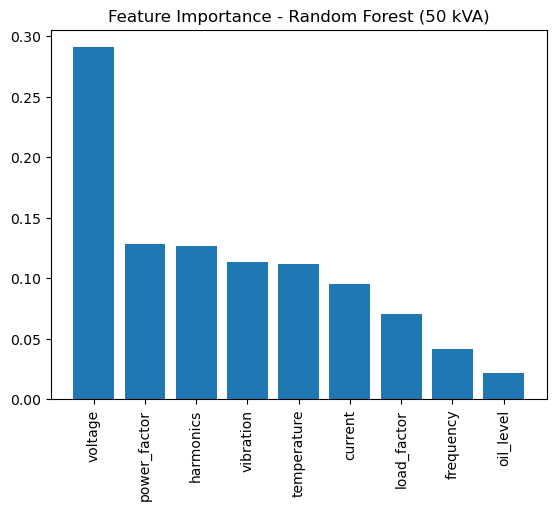

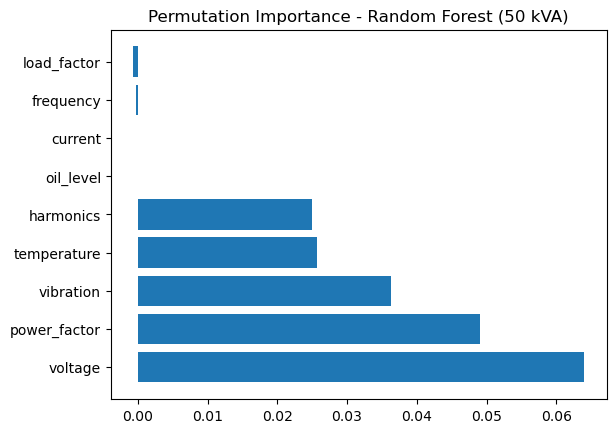

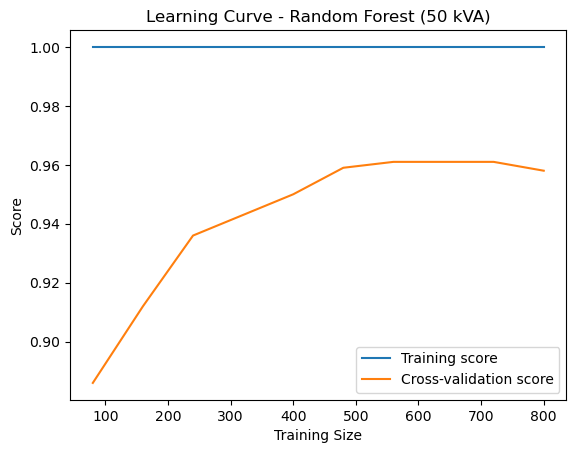

In [4]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest (50 kVA)')
plt.show()

# Plot feature importance (relationships)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title('Feature Importance - Random Forest (50 kVA)')
plt.show()

# Permutation importance for additional relationships insight
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X.shape[1]), [features[i] for i in sorted_idx])
plt.title('Permutation Importance - Random Forest (50 kVA)')
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve - Random Forest (50 kVA)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

In [5]:
##### ANN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


In [6]:

# Load the dataset
df = pd.read_csv('synthetic_data_pandapower_50kVA.csv')

# Features and target
features = ['voltage', 'current', 'temperature', 'oil_level', 'vibration', 
            'power_factor', 'frequency', 'harmonics', 'load_factor']
X = df[features]
y = df['fault_type']



In [7]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



In [8]:
# Train Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")



Accuracy: 0.9633


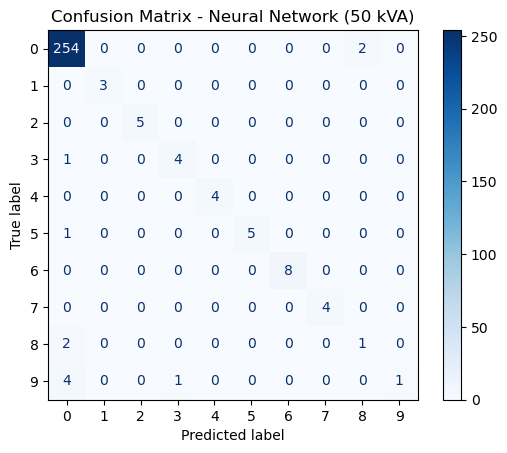

In [9]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network (50 kVA)')
plt.show()



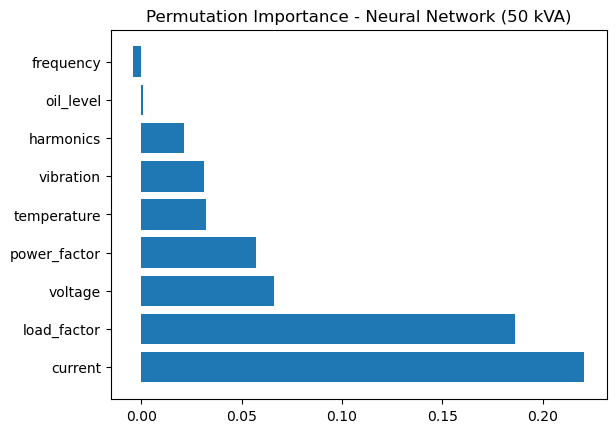

In [10]:
# Permutation importance for relationships insight (since NN doesn't have direct feature importance)
perm_importance = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X.shape[1]), [features[i] for i in sorted_idx])
plt.title('Permutation Importance - Neural Network (50 kVA)')
plt.show()



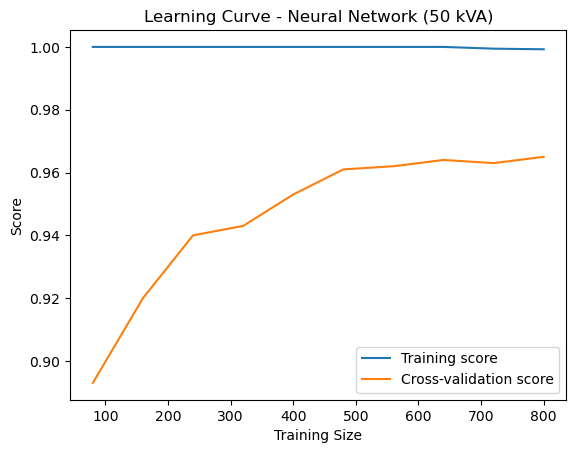

In [11]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X_scaled, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve - Neural Network (50 kVA)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

In [12]:
## SAVING THE MODELS
import joblib
rating=50
joblib.dump(rf, f"models/rf_{rating}kva.pkl")
joblib.dump(mlp, f"models/nn_{rating}kva.pkl")
joblib.dump(scaler, f"models/scaler_{rating}kva.pkl")
print(f"Saved models and scaler for {rating} kVA")



Saved models and scaler for 50 kVA
